In [7]:
import sys,os,json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from modules import colours
plt.style.use('prettyfigs')

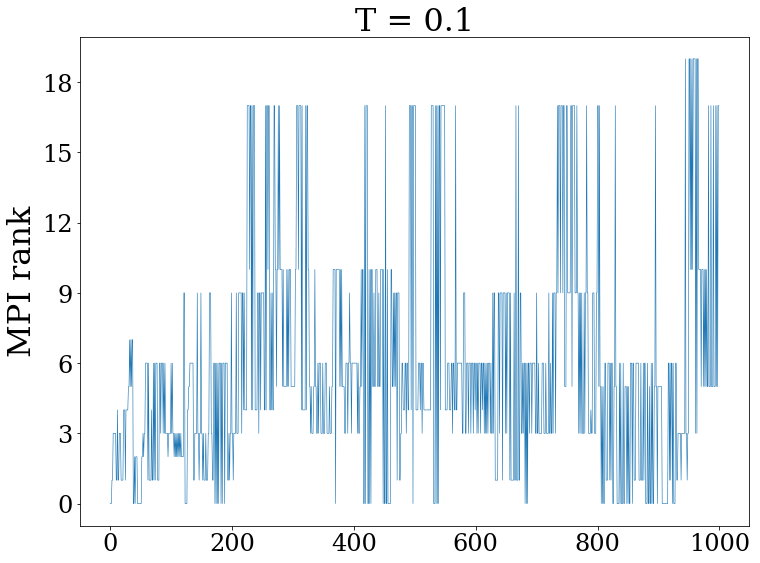

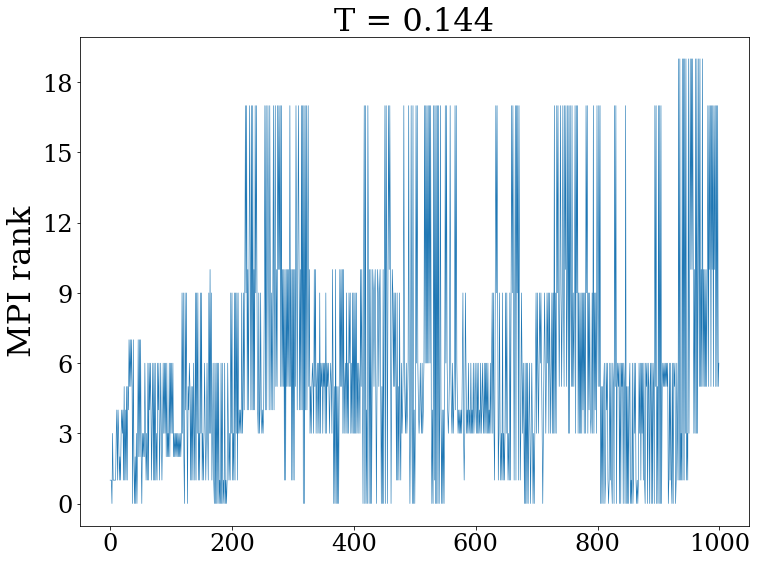

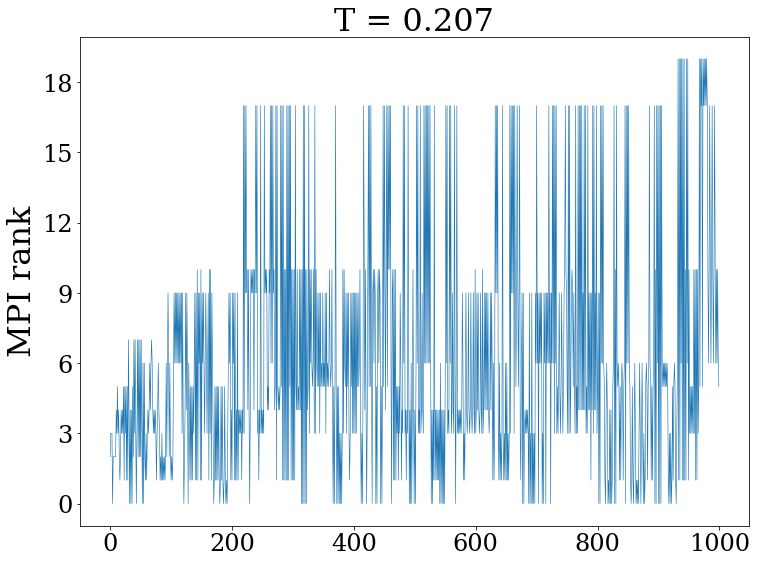

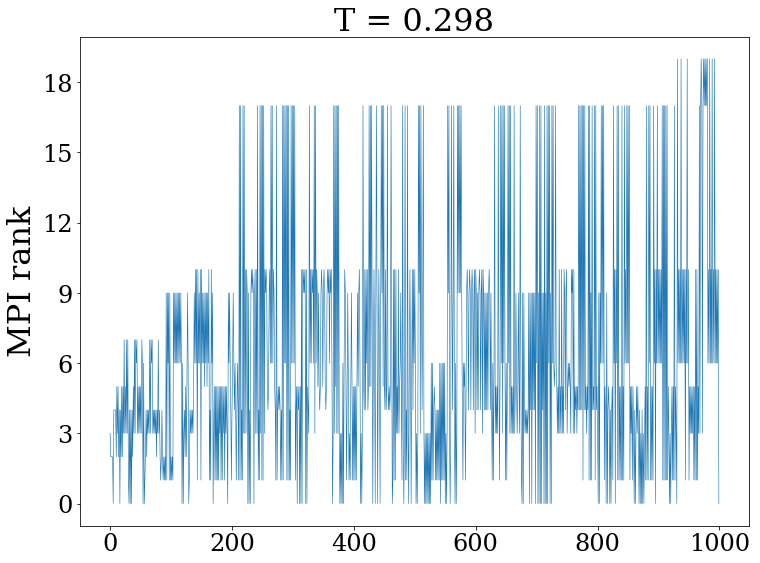

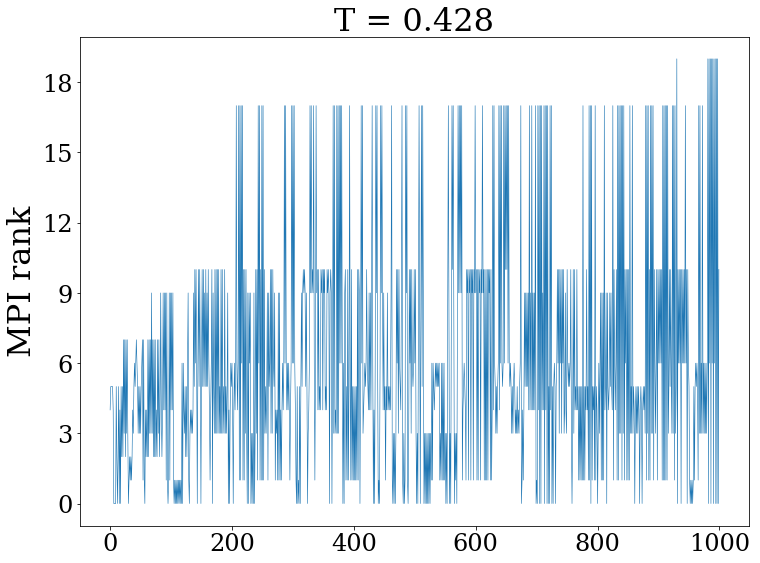

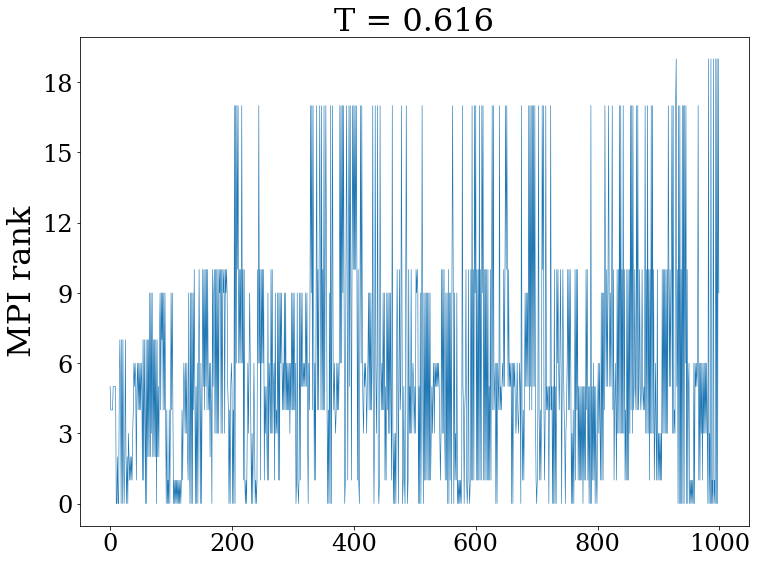

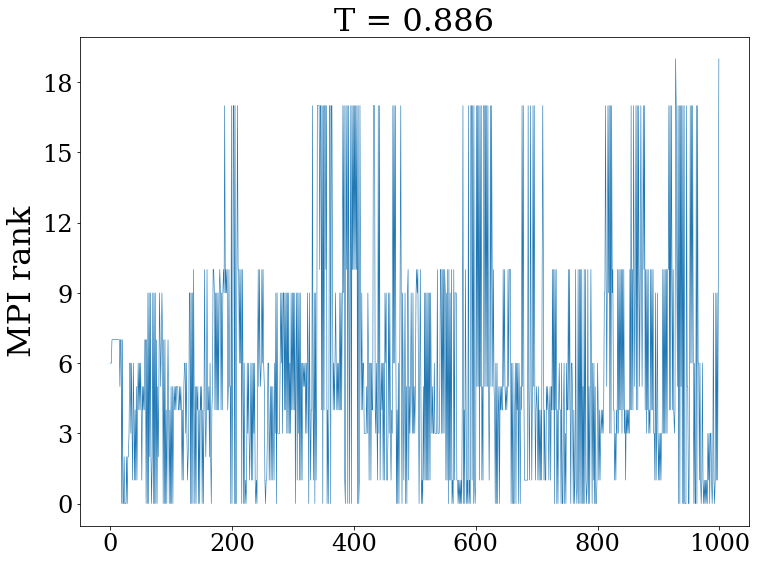

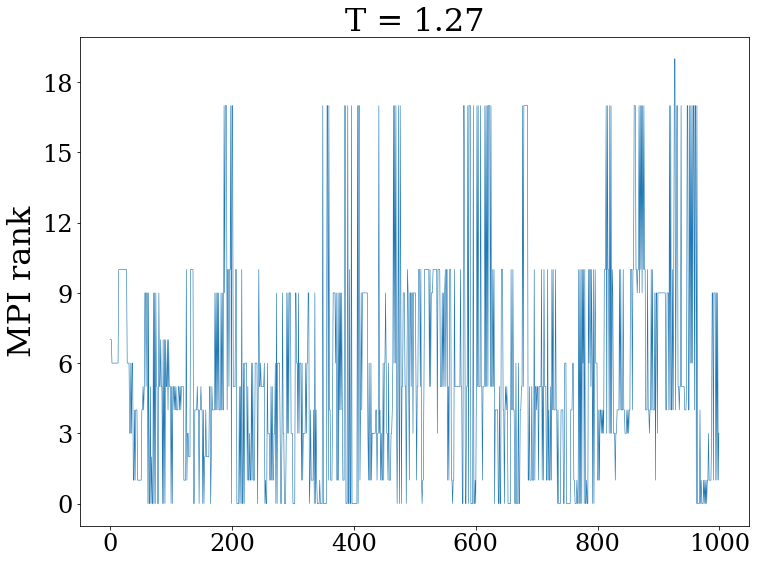

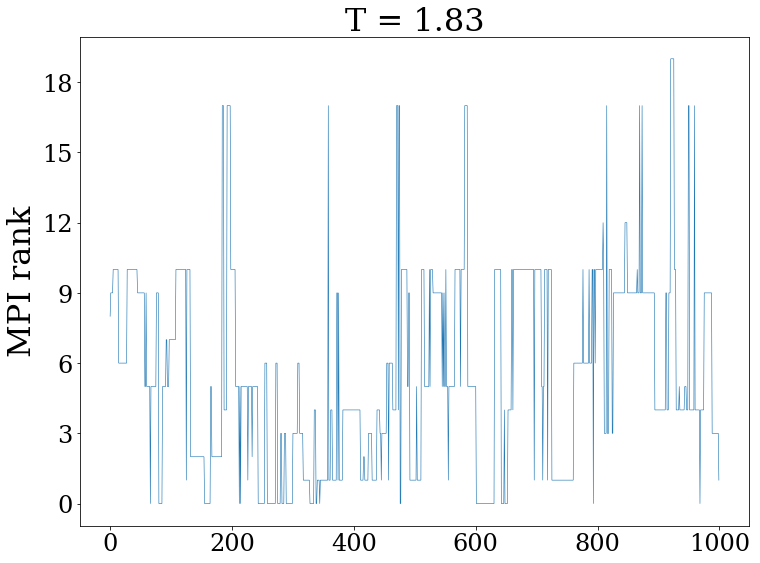

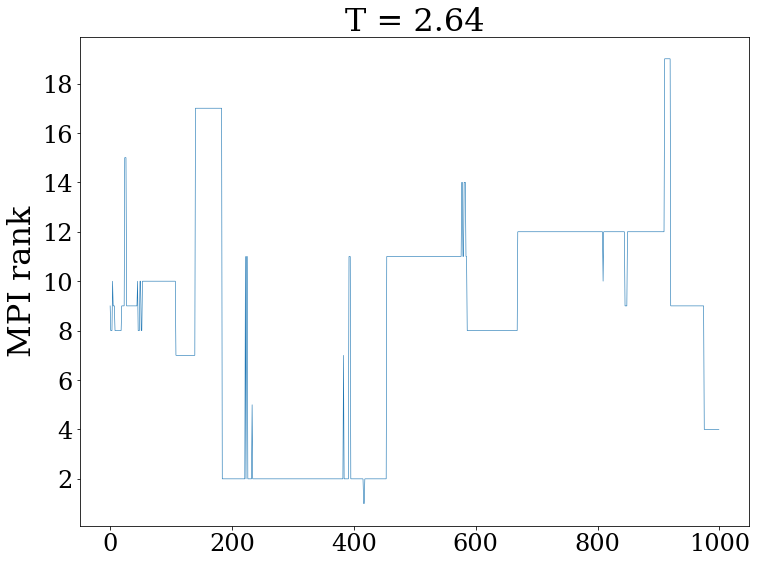

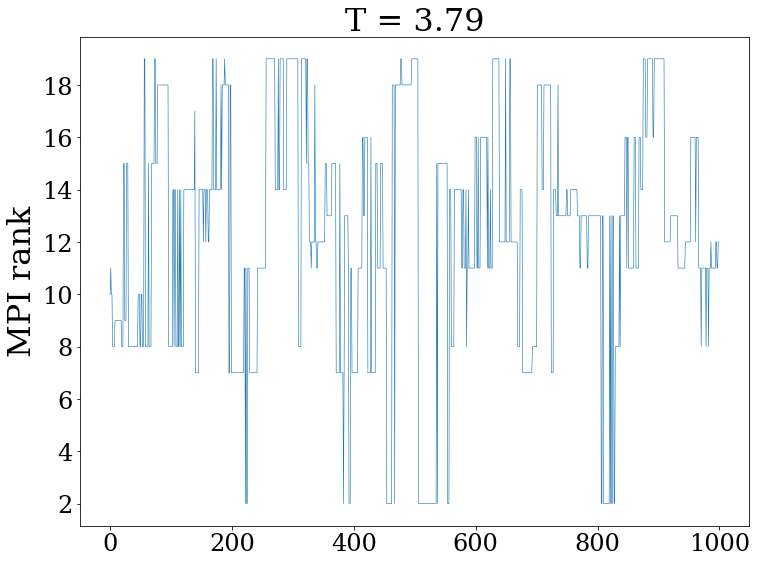

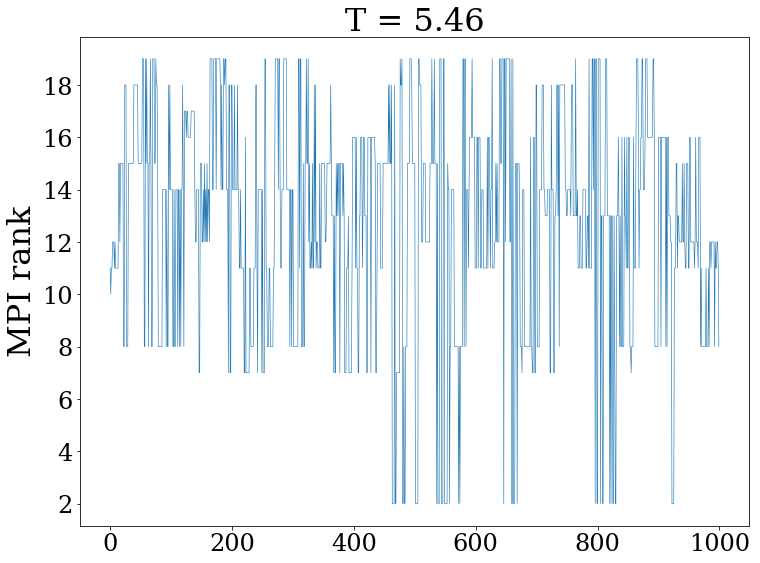

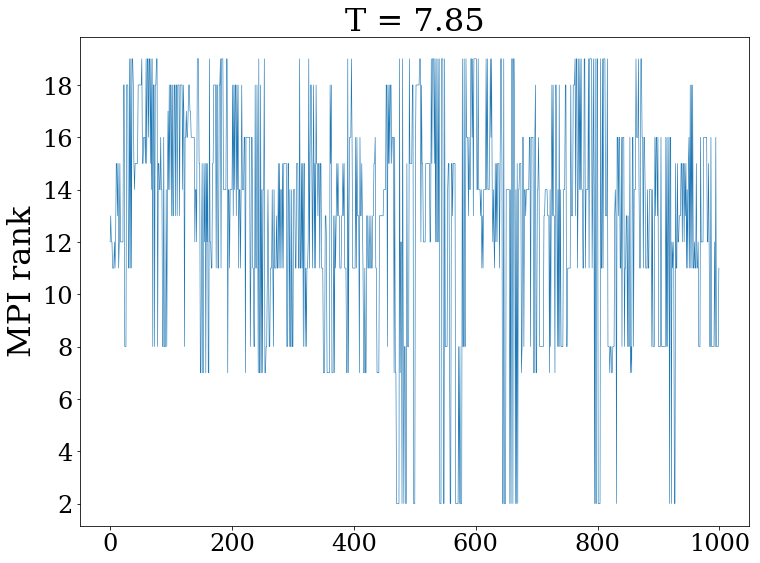

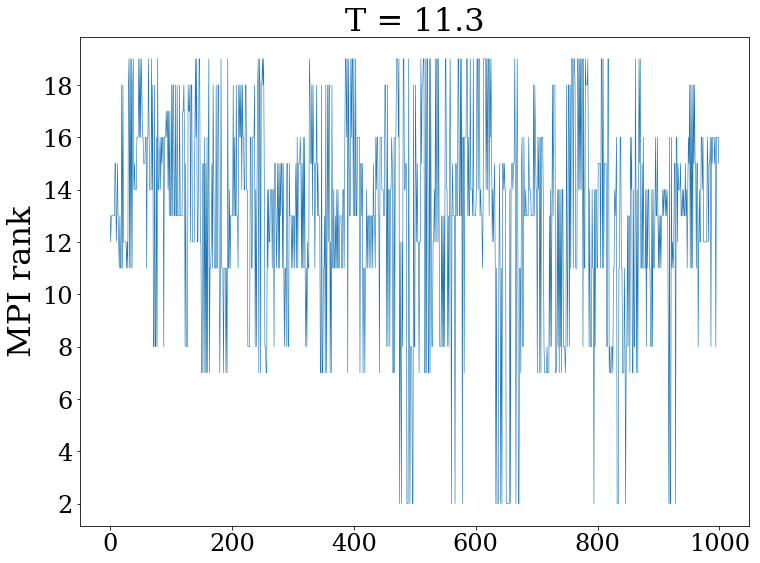

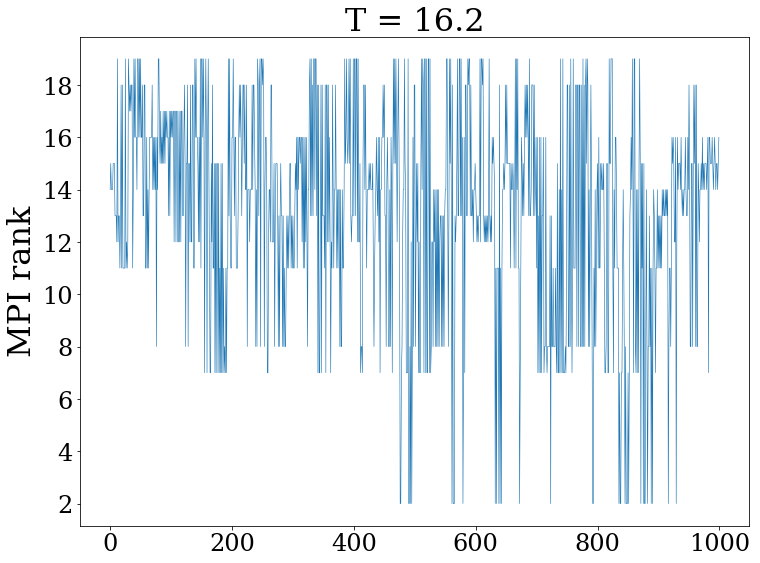

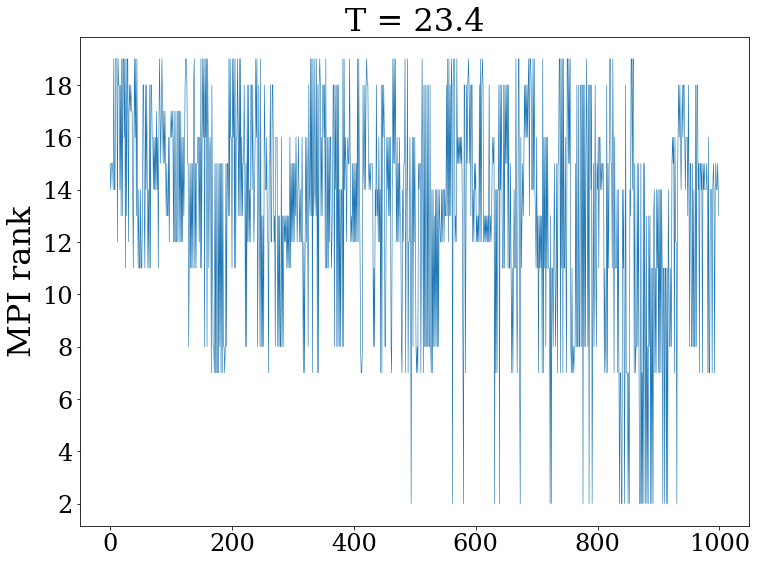

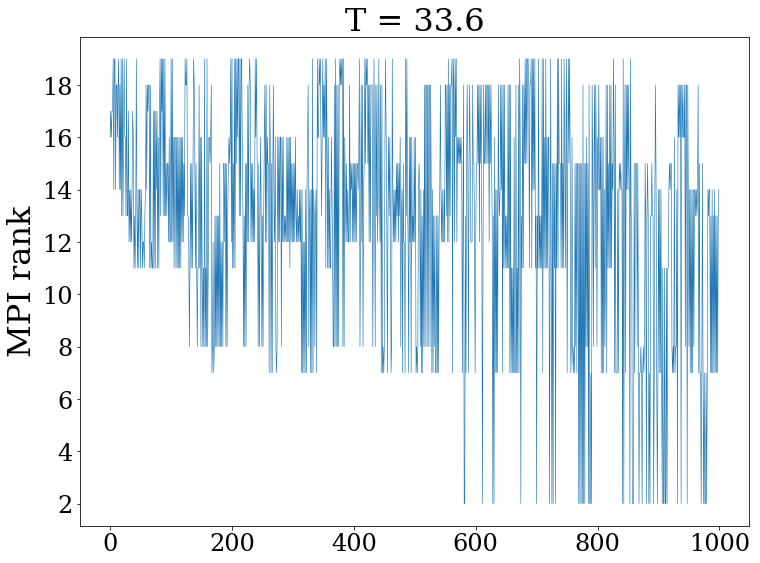

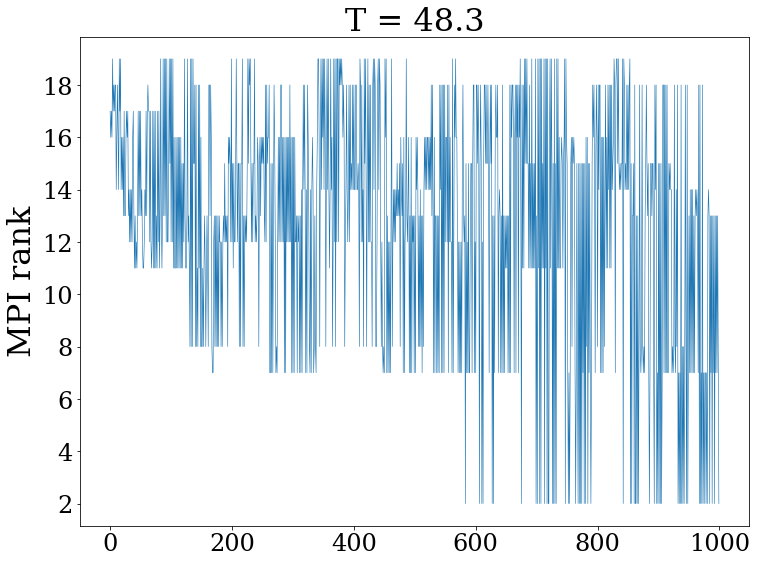

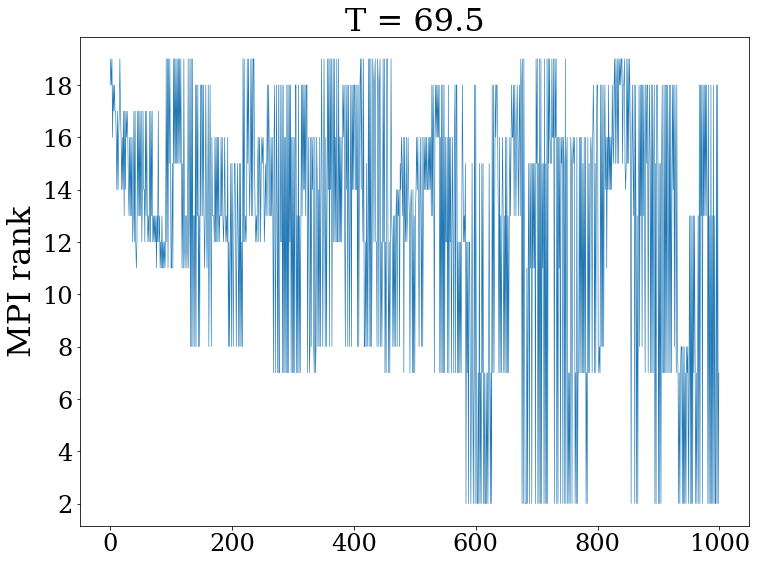

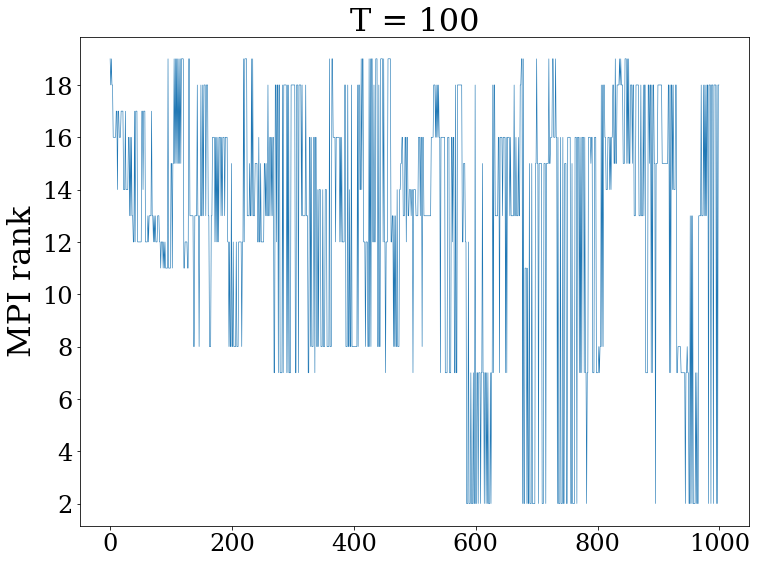

In [8]:
# plot each of the timeseries of the random walk each temperature took over processes
for i in range(20):
    try:
        with open('../output/timeseries2d-ising_T'+str(i)+'.json') as file:
            timeseries = json.load(file)
    except json.JSONDecodeError:
        print('failed for file '+str(i))
        raise
        
    fig,ax1 = plt.subplots()
    ax1.set_title('T = '+"{0:.3g}".format(1./timeseries[0]['beta']))
    
    linewidth = 0.6
    ax1.plot([timeseries[t]['rank'] for t in range(len(timeseries))],\
             '-',linewidth=linewidth,label='MPI rank')
    
    ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.set_ylabel('MPI rank')
    plt.show()

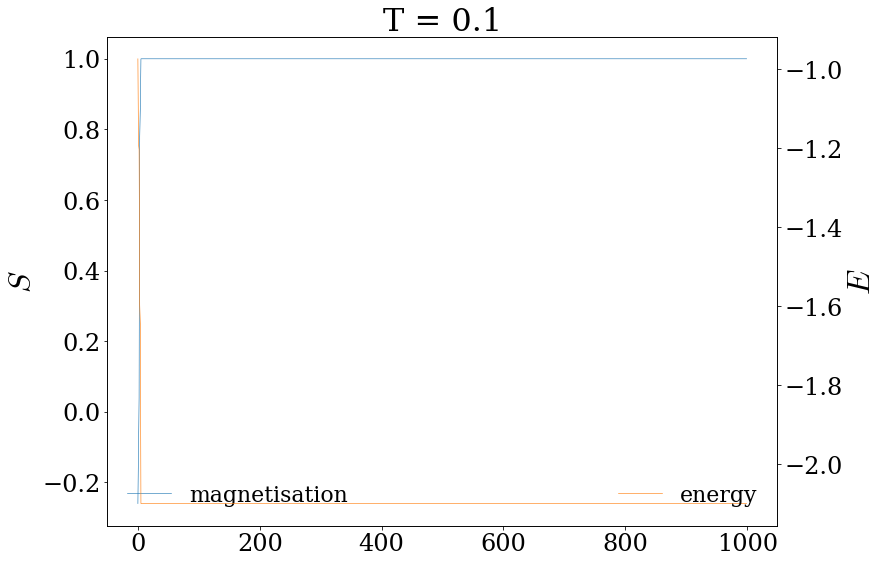

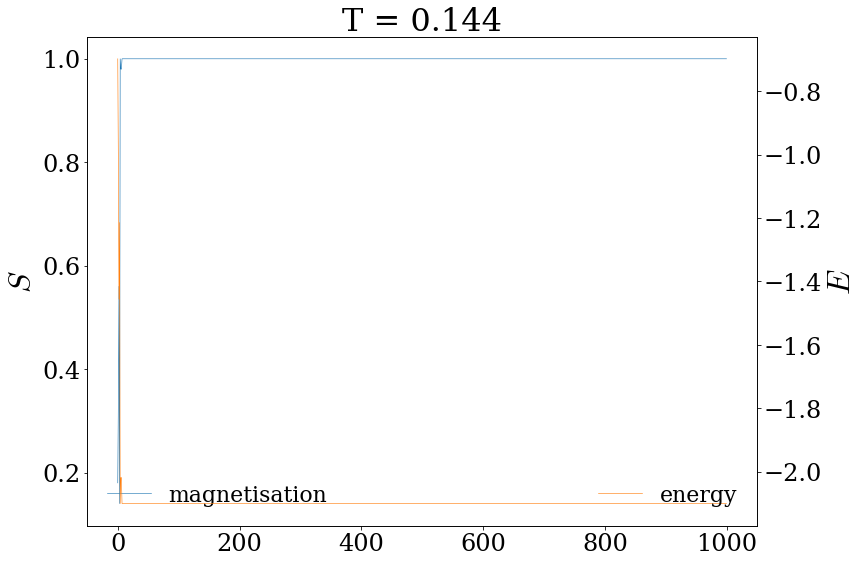

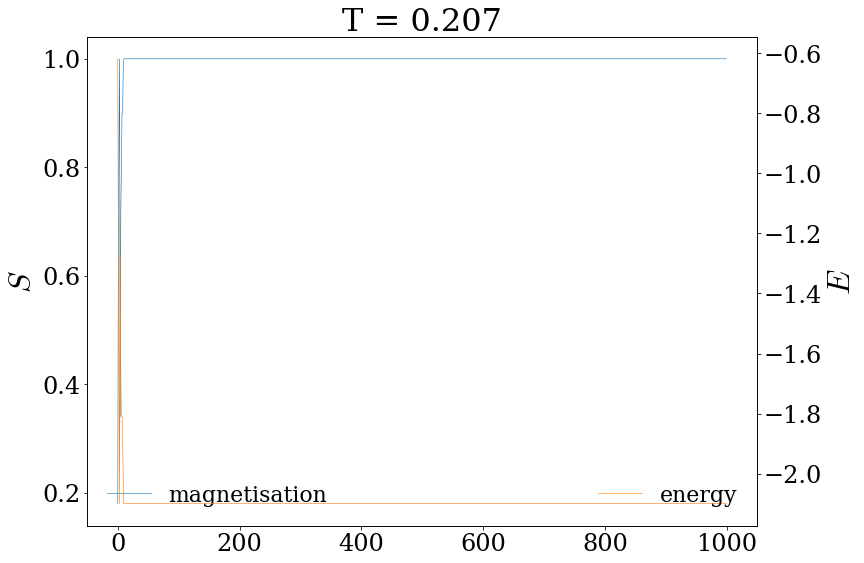

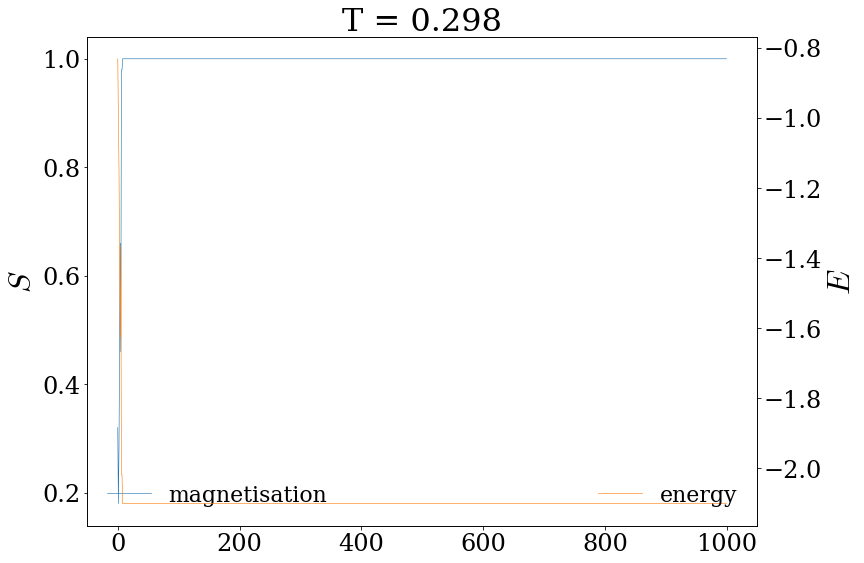

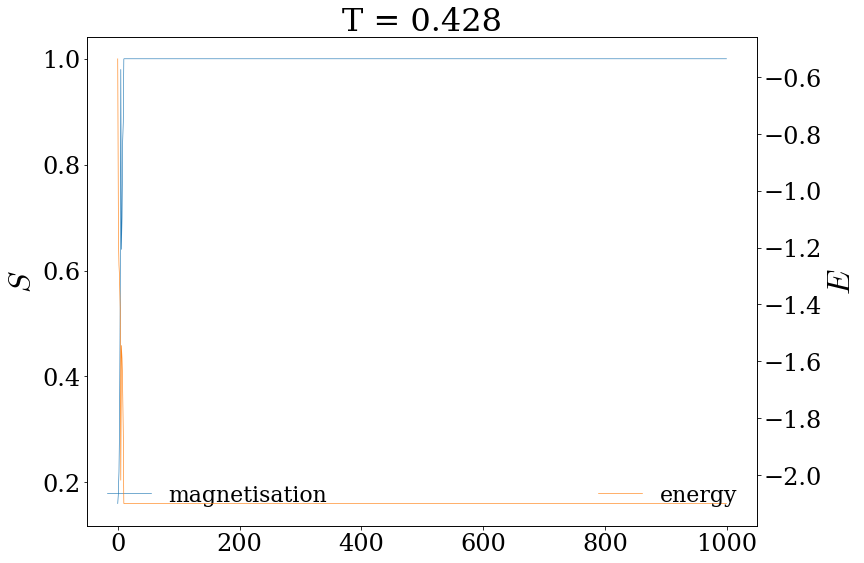

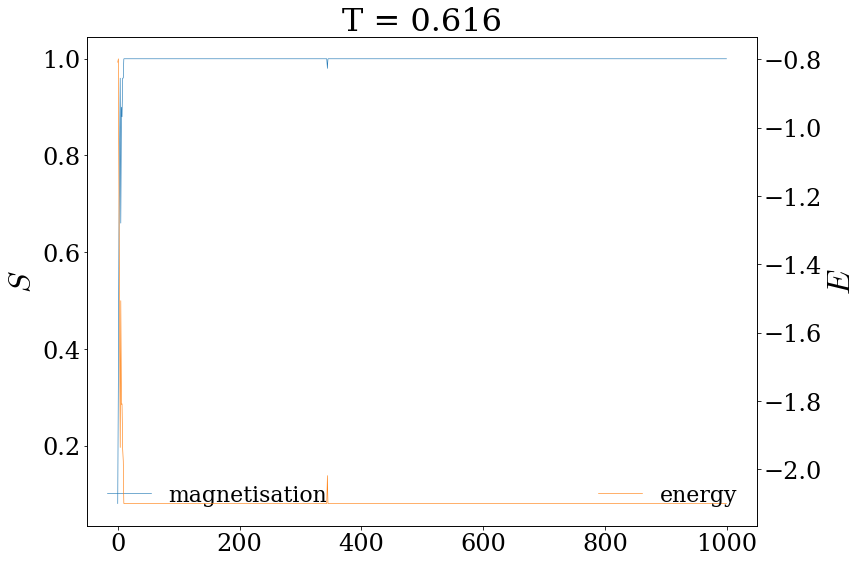

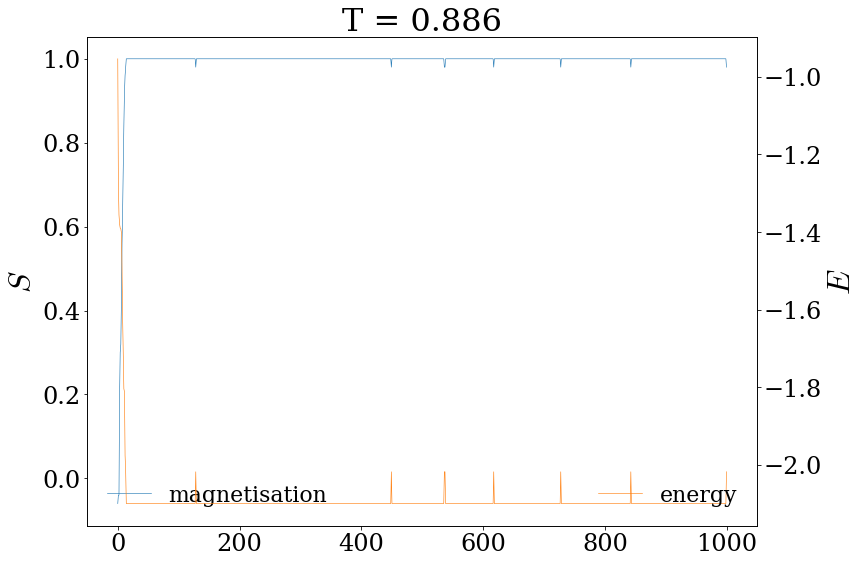

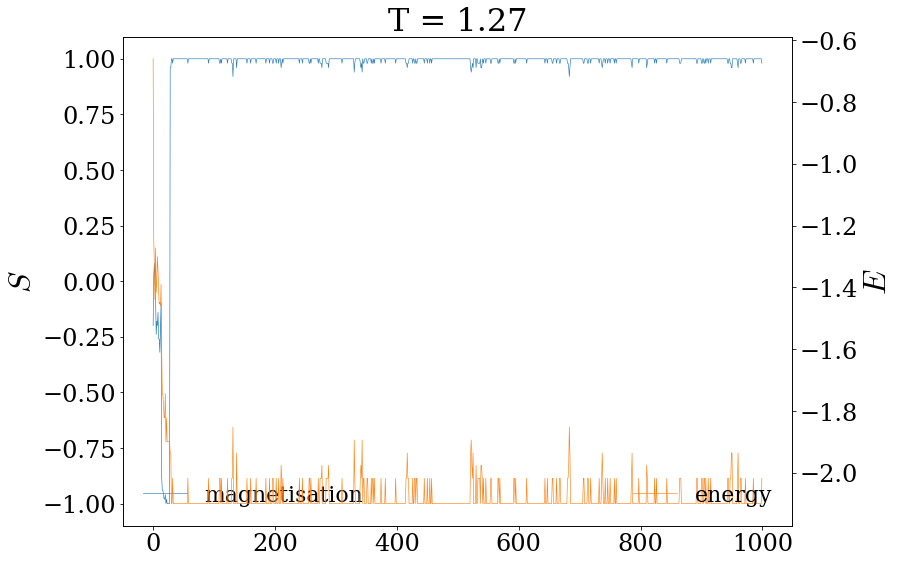

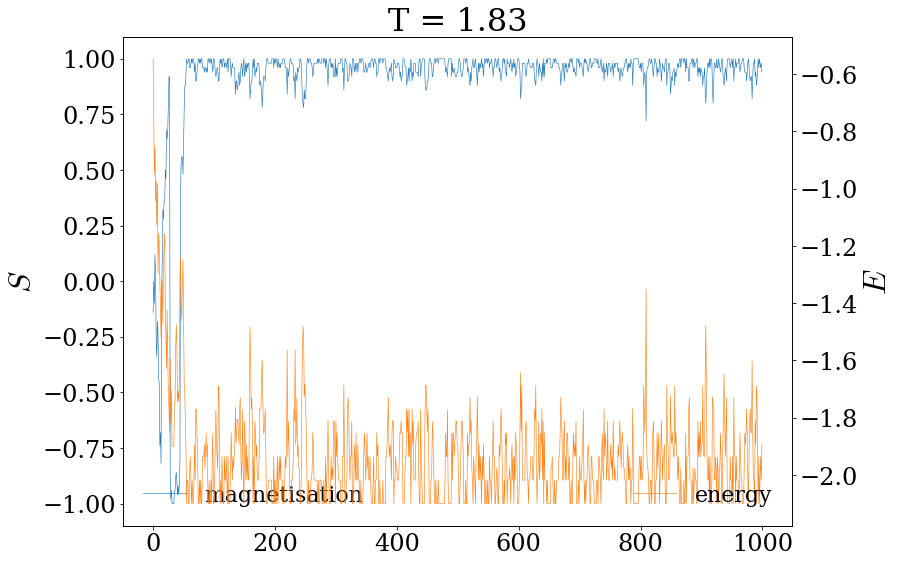

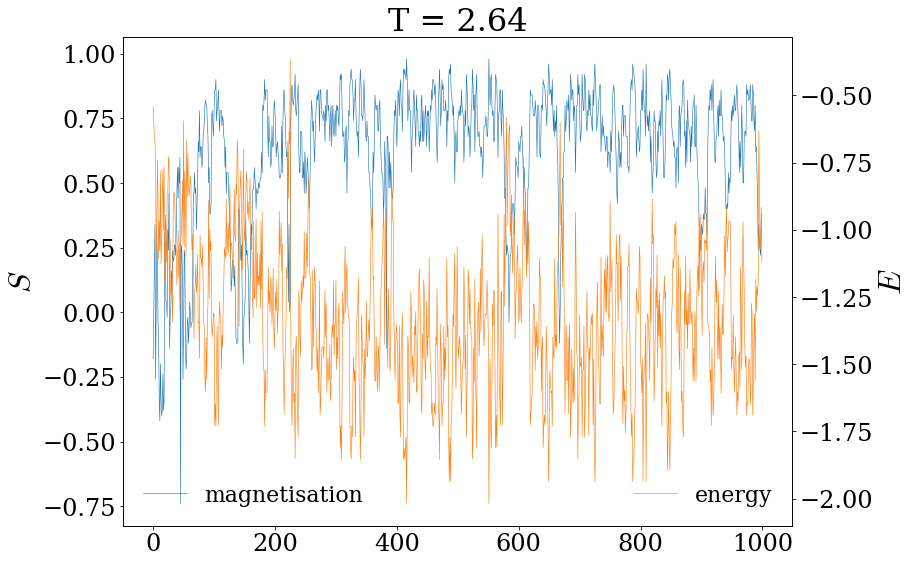

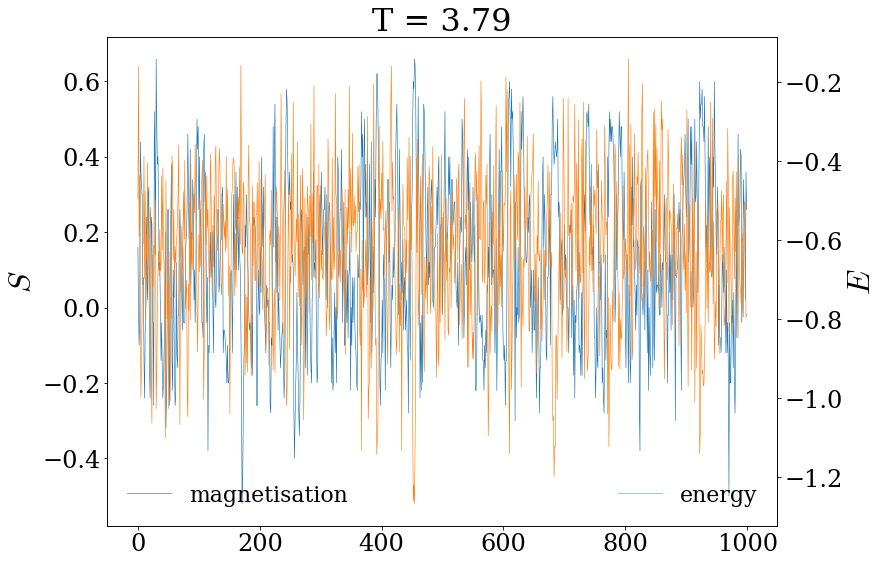

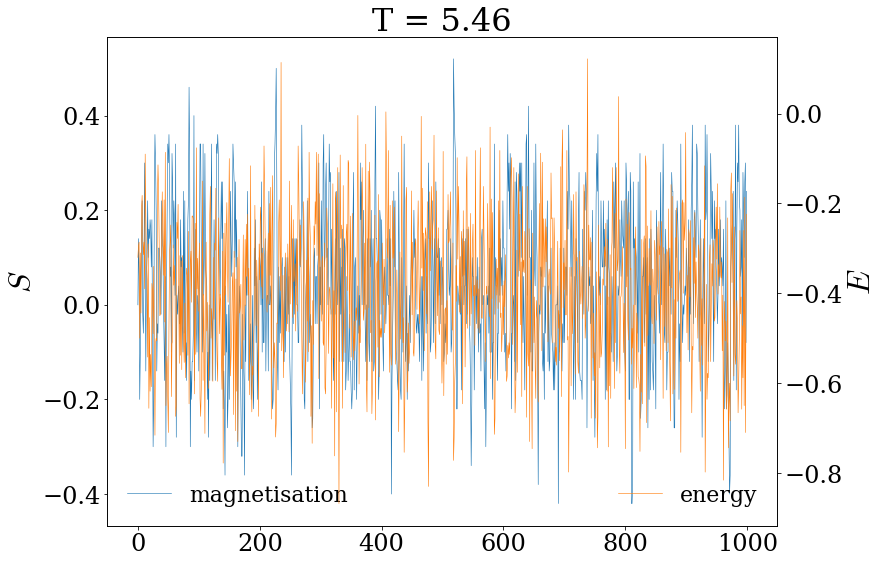

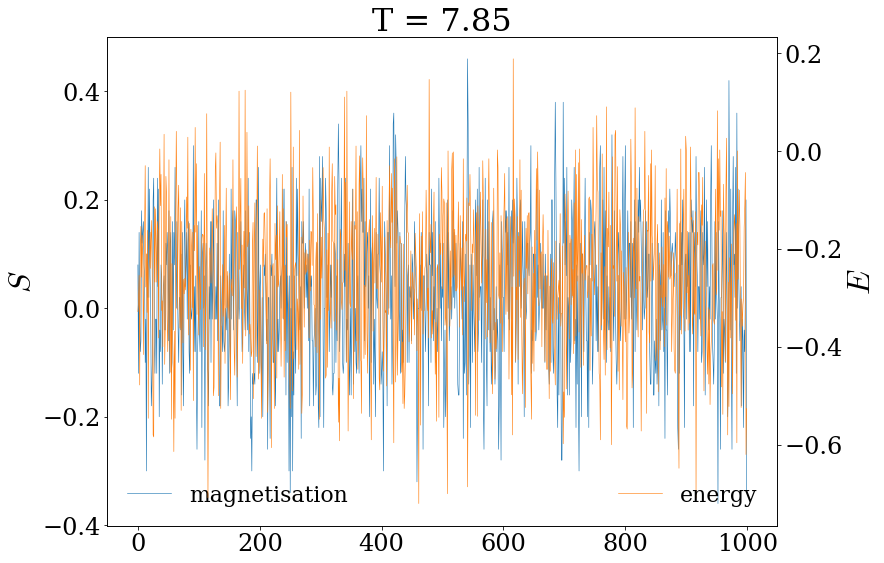

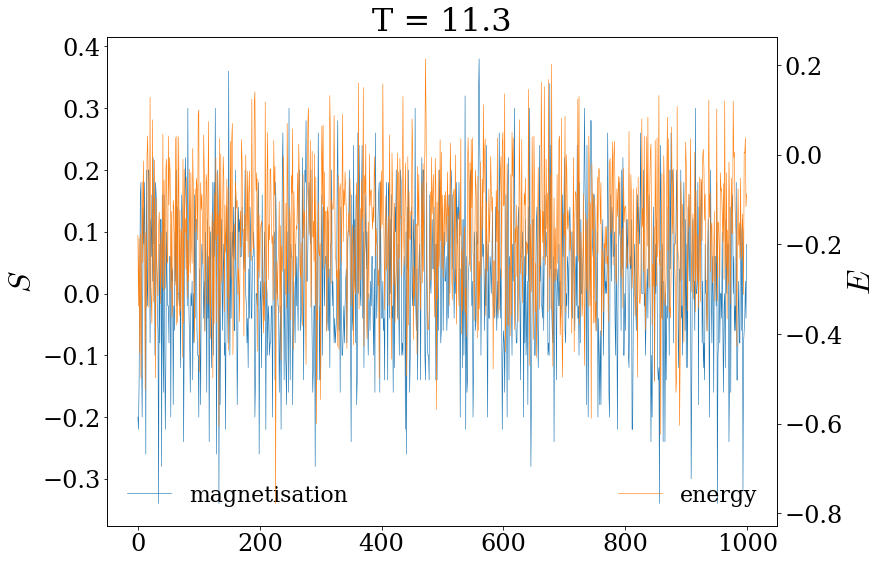

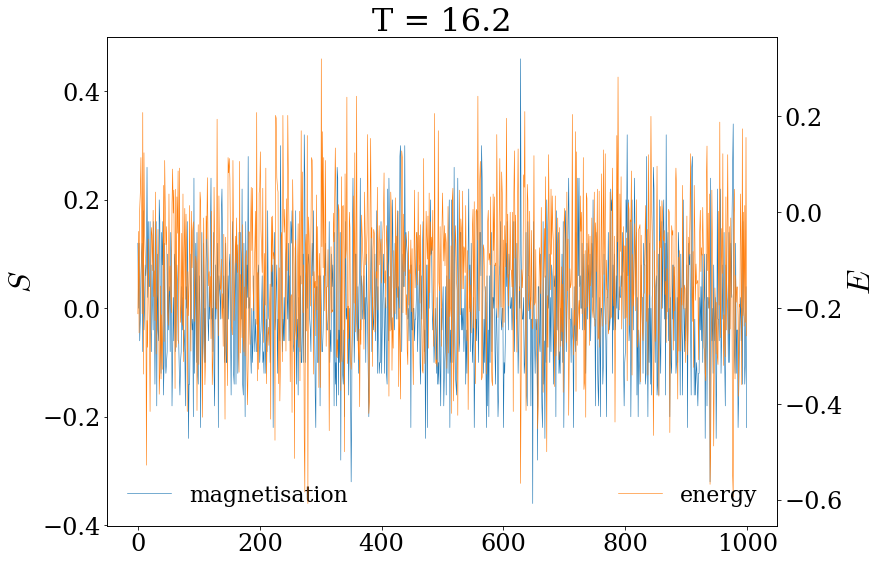

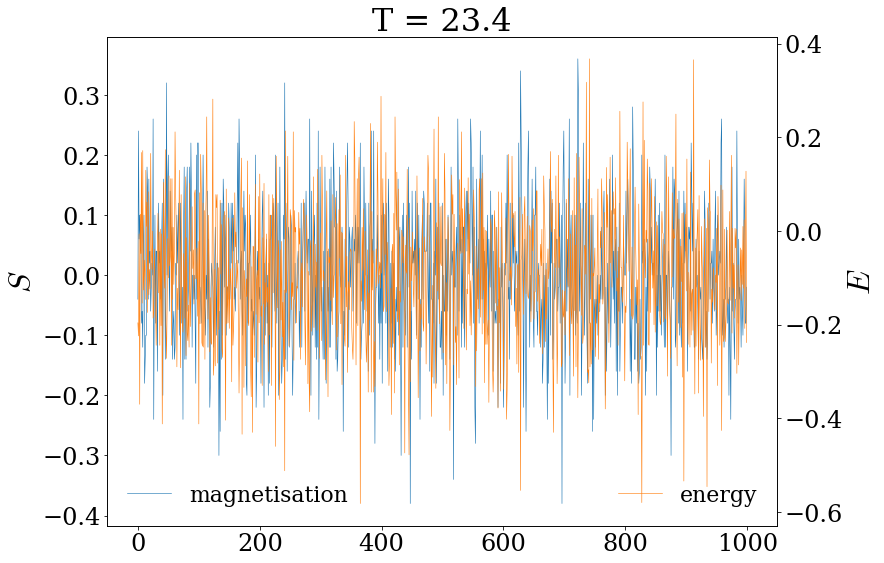

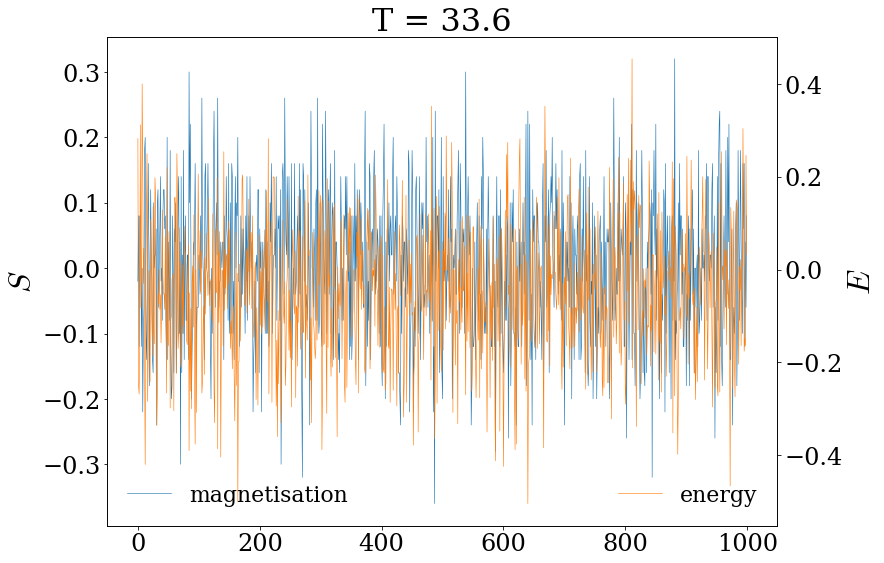

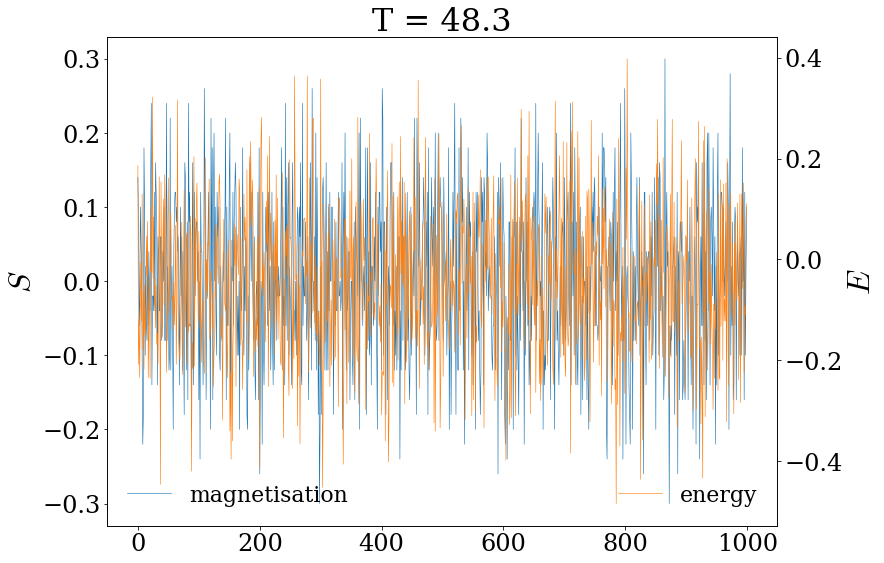

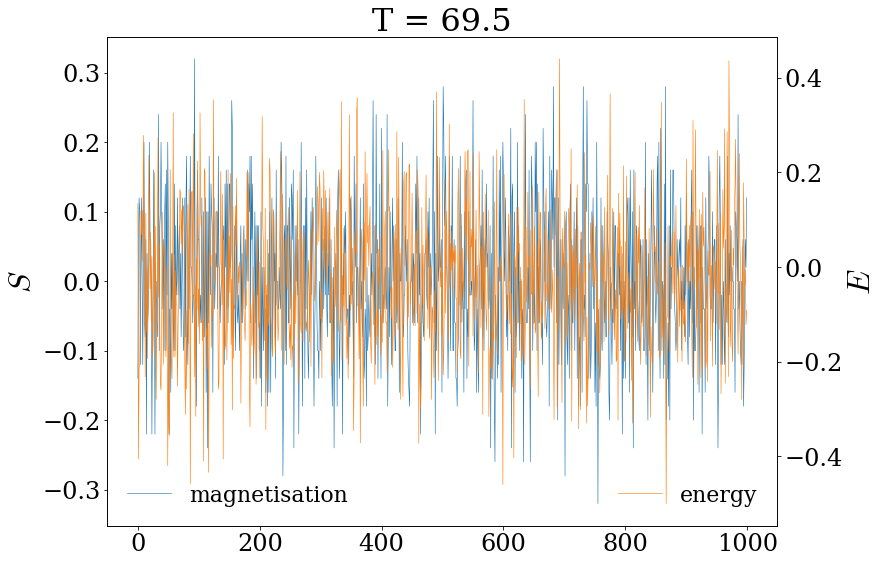

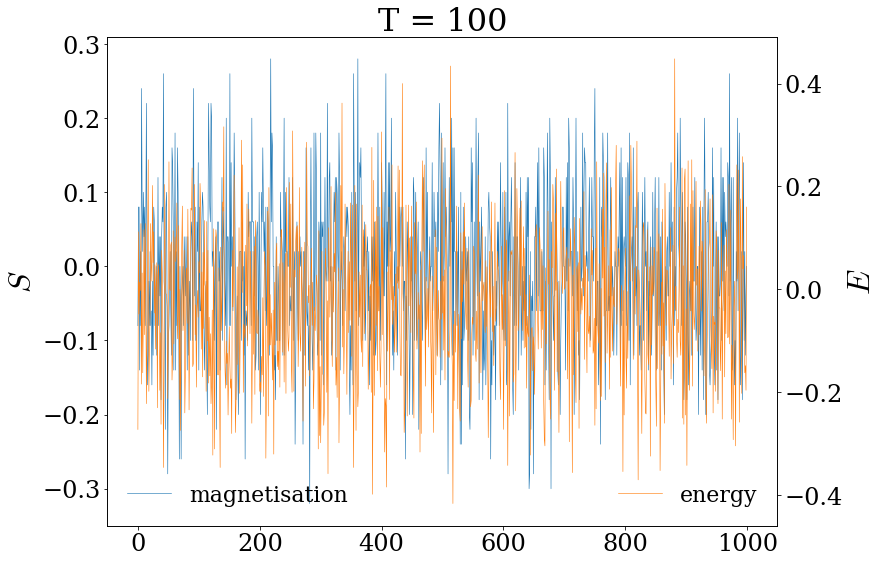

In [4]:
# plot each of the energy and magnetisation timeseries
for i in range(20):
    try:
        with open('../output/timeseries2d-ising_T'+str(i)+'.json') as file:
            timeseries = json.load(file)
    except json.JSONDecodeError:
        print('failed for file '+str(i))
        raise
        
    fig,ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.set_title('T = '+"{0:.3g}".format(1./timeseries[0]['beta']))
    
    linewidth = 0.6
    ax1.plot([timeseries[t]['magnetisation']/100 for t in range(len(timeseries))],\
             '-',linewidth=linewidth,label='magnetisation')
    ax2.plot([timeseries[t]['energy']/100 for t in range(len(timeseries))],\
             '-',color=colours.tableau20_solid[1],linewidth=linewidth,label='energy')
    
    ax1.set_ylabel(r'$S$')
    ax2.set_ylabel(r'$E$')
    ax1.legend(loc=3)
    ax2.legend(loc=4)
    plt.show()

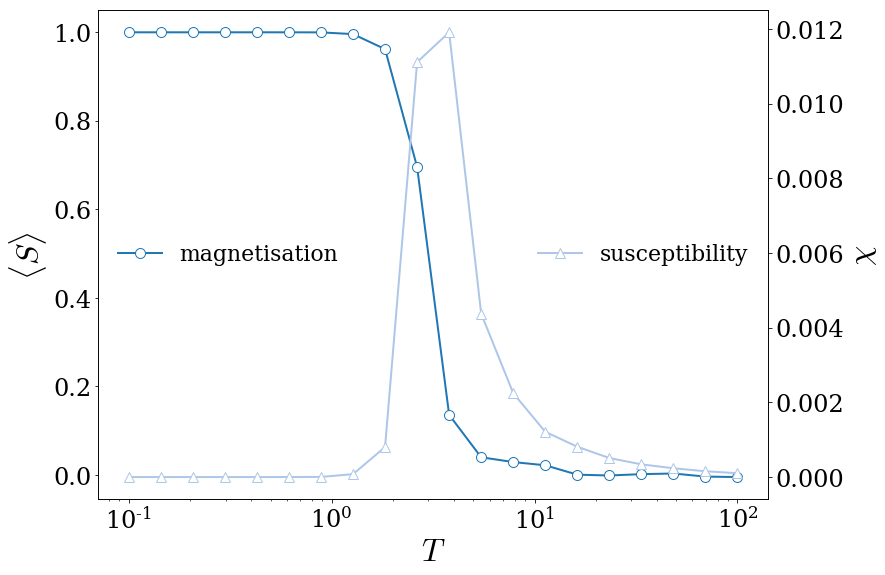

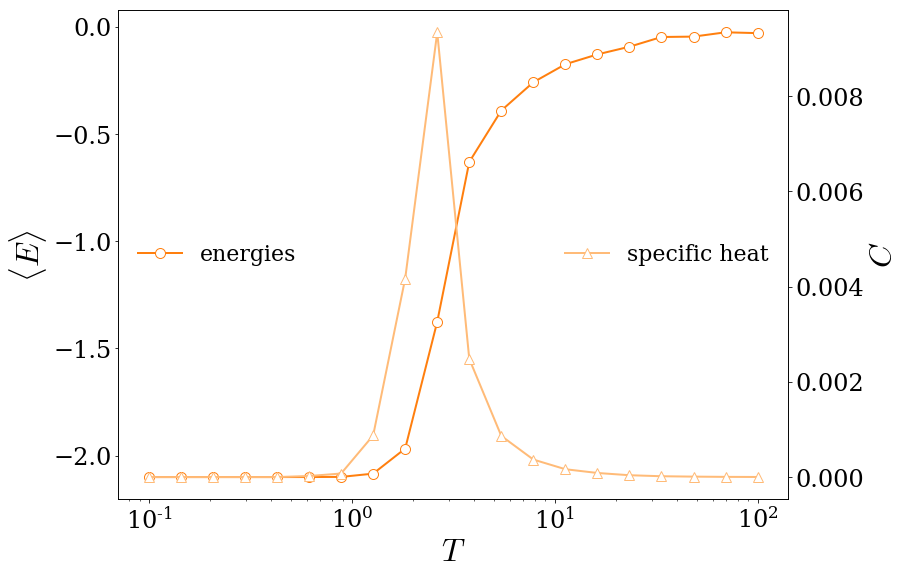

In [10]:
# compute averages from the last 2000 points
number_T = 20
start_using_data = 200
avg_energies = np.zeros(number_T)
avg_magnetisation = np.zeros(number_T)
var_energies = np.zeros(number_T)
var_magnetisation = np.zeros(number_T)
T = np.zeros(number_T)
for i in range(number_T):
    try:
        with open('../output/timeseries2d-ising_T'+str(i)+'.json') as file:
            timeseries = json.load(file)
    except json.JSONDecodeError:
        print('failed for file '+str(i))
        raise
        
    T[i] = 1./timeseries[0]['beta']
    energies = np.array([timeseries[t]['energy'] for t in range(len(timeseries))])/100
    magnetisations = np.array([timeseries[t]['magnetisation'] for t in range(len(timeseries))])/100
    avg_energies[i] = np.mean(energies[start_using_data:])
    var_energies[i] = np.var(energies[start_using_data:],ddof=1)
    avg_magnetisation[i] = np.mean(magnetisations[start_using_data:])
    var_magnetisation[i] = np.var(magnetisations[start_using_data:],ddof=1)

markersize = 10
linewidth = 2
    
# ---------
        
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(T,avg_magnetisation,'o-',markersize=markersize,markerfacecolor='w',\
         color=colours.tableau20_solid[0],linewidth=linewidth,label='magnetisation')
ax2.plot(T,var_magnetisation/T,'^-',markersize=markersize,markerfacecolor='w',\
         color=colours.tableau20_light[0],linewidth=linewidth,label='susceptibility')

ax1.set_xscale('log')
ax1.set_ylabel(r'$\langle S \rangle$')
ax2.set_ylabel(r'$\chi$')
ax1.set_xlabel(r'$T$')
ax1.legend(loc=6)
ax2.legend(loc=7)
plt.show()

# ---------

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(T,avg_energies,'o-',markersize=markersize,markerfacecolor='w',\
         color=colours.tableau20_solid[1],linewidth=linewidth,label='energies')
ax2.plot(T,var_energies/T**2,'^-',markersize=markersize,markerfacecolor='w',\
         color=colours.tableau20_light[1],linewidth=linewidth,label='specific heat')

ax1.set_xscale('log')
ax1.set_ylabel(r'$\langle E \rangle$')
ax2.set_ylabel(r'$C$')
ax1.set_xlabel(r'$T$')
ax1.legend(loc=6)
ax2.legend(loc=7)
plt.show()